# 6. Quiz

### 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.

주의) 사전 작업으로 아래 코드 셀을 먼저 실행하시오

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장하시오.

In [63]:
dataset = pd.read_csv('QuizData.csv')
total = dataset.iloc[:,:-1].values # 참석 인원
reception = dataset.iloc[:,1].values # 식수 인원
total, reception

(array([[118],
        [253],
        [320],
        [ 94],
        [155],
        [188],
        [201],
        [338],
        [186],
        [183],
        [223],
        [392],
        [ 86],
        [112],
        [129],
        [223],
        [288],
        [262],
        [143],
        [179]], dtype=int64),
 array([ 62, 148, 201,  80,  92, 131, 147, 187, 124, 152, 143, 199,  58,
         68,  76, 149, 152, 183,  88, 101], dtype=int64))

### 2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하시오. 이 때 비율은 75 : 25 로 합니다.

(단, random_state = 0 으로 설정)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(total, reception,test_size=0.25, random_state=0)


### 3) 훈련 세트를 이용하여 단순 선형 회귀 (Simple Linear Regression) 모델을 생성하시오.

In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### 4) 데이터 시각화 (훈련 세트) 코드를 작성하시오.

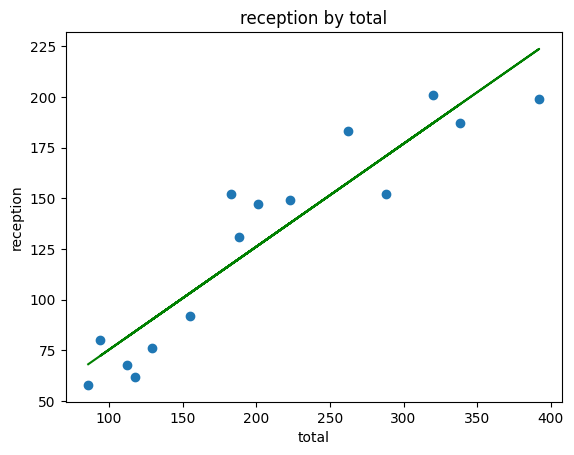

In [66]:
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('reception by total (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

### 5) 데이터 시각화 (테스트 세트) 코드를 작성하시오.

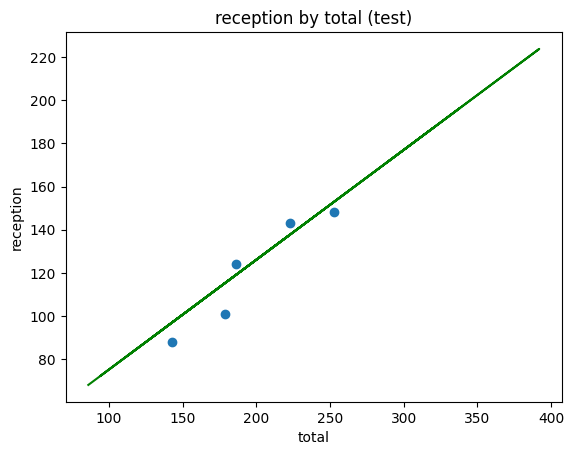

In [74]:

plt.scatter(X_test, y_test)
plt.plot(X_train, reg.predict(X_train), color='green')
# plt.plot(X_test, reg.predict(X_test), color='green') # 같은 결과임
plt.title('reception by total (test)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

### 6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [76]:
reg.score(X_train, y_train)

0.8707088403321211

In [77]:
reg.score(X_test, y_test)

0.8634953212566615

### 7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [83]:
total = 300
y_pred = reg.predict([[total]]) # 대괄호 2개 주의

print(f'결혼식 참석 인원 {total} 명에 대한 예상 식수 인원은 {np.around(y_pred[0]).astype(int)} 명 입니다')

결혼식 참석 인원 300 명에 대한 예상 식수 인원은 177 명 입니다
